In [1]:
#package imports
import numpy as np 
import pandas as pd 
import os
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency, ttest_ind
import scipy.stats as stats
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [52]:

# . On récupère le dossier de travail actuel
dossier_actuel = os.getcwd()
nom_fichier = 'Heart_Disease_Prediction.csv'

# . On construit le chemin complet vers le fichier
chemin_complet = os.path.join(dossier_actuel, nom_fichier)

# . Vérification avec 'os' : le fichier existe-t-il ?
if os.path.exists(chemin_complet):
    print(f"Succès : Le fichier a été trouvé à l'adresse : {chemin_complet}")
    
    # . Importation de la base de données avec pandas
    df = pd.read_csv(chemin_complet)
    
    

Succès : Le fichier a été trouvé à l'adresse : c:\Users\nercy\programmation_project\Heart_Disease_Prediction.csv


# BASICS ABOUT THE DATASET

In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      270 non-null    int64  
 1   Sex                      270 non-null    int64  
 2   Chest pain type          270 non-null    int64  
 3   BP                       270 non-null    int64  
 4   Cholesterol              270 non-null    int64  
 5   FBS over 120             270 non-null    int64  
 6   EKG results              270 non-null    int64  
 7   Max HR                   270 non-null    int64  
 8   Exercise angina          270 non-null    int64  
 9   ST depression            270 non-null    float64
 10  Slope of ST              270 non-null    int64  
 11  Number of vessels fluro  270 non-null    int64  
 12  Thallium                 270 non-null    int64  
 13  Heart Disease            270 non-null    object 
dtypes: float64(1), int64(12), 

In [54]:
df.shape

(270, 14)

In [55]:
df.head()

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,Presence
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,Absence
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,Presence
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,Absence
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,Absence


In [56]:
df.dtypes

Age                          int64
Sex                          int64
Chest pain type              int64
BP                           int64
Cholesterol                  int64
FBS over 120                 int64
EKG results                  int64
Max HR                       int64
Exercise angina              int64
ST depression              float64
Slope of ST                  int64
Number of vessels fluro      int64
Thallium                     int64
Heart Disease               object
dtype: object

In [57]:
df.describe()

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium
count,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.00000,270.000000,270.000000,270.000000
mean,54.433333,0.677778,3.174074,131.344444,249.659259,0.148148,1.022222,149.677778,0.329630,1.05000,1.585185,0.670370,4.696296
std,9.109067,0.468195,0.950090,17.861608,51.686237,0.355906,0.997891,23.165717,0.470952,1.14521,0.614390,0.943896,1.940659
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.00000,1.000000,0.000000,3.000000
25%,48.000000,0.000000,3.000000,120.000000,213.000000,0.000000,0.000000,133.000000,0.000000,0.00000,1.000000,0.000000,3.000000
50%,55.000000,1.000000,3.000000,130.000000,245.000000,0.000000,2.000000,153.500000,0.000000,0.80000,2.000000,0.000000,3.000000
75%,61.000000,1.000000,4.000000,140.000000,280.000000,0.000000,2.000000,166.000000,1.000000,1.60000,2.000000,1.000000,7.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.20000,3.000000,3.000000,7.000000


In [58]:
print(df.duplicated().sum())

0


# finding missing data

In [59]:
df.isnull().sum()

Age                        0
Sex                        0
Chest pain type            0
BP                         0
Cholesterol                0
FBS over 120               0
EKG results                0
Max HR                     0
Exercise angina            0
ST depression              0
Slope of ST                0
Number of vessels fluro    0
Thallium                   0
Heart Disease              0
dtype: int64

# Target Encoding

In [60]:

# 2. LA BASE "TRAVAIL" (Nettoyée)
# On crée une copie exacte pour ne pas modifier l'originale.
df_cleaned = df.copy()

# On fait la conversion (Step 1 du projet) uniquement sur cette copie [cite: 23]
df_cleaned['Heart Disease'] = df_cleaned['Heart Disease'].map({'Presence': 1, 'Absence': 0})

# --- COMMENT LES DISTINGUER DANS VOTRE CODE ---

print("--- APERÇU DE LA BASE NORMALE (df_original) ---")
print(df['Heart Disease'].head(3)) 
# Affiche : Presence, Absence, Presence...

print("\n--- APERÇU DE LA BASE TRAVAIL (df_cleaned) ---")
print(df_cleaned['Heart Disease'].head(3))
# Affiche : 1, 0, 1...

--- APERÇU DE LA BASE NORMALE (df_original) ---
0    Presence
1     Absence
2    Presence
Name: Heart Disease, dtype: object

--- APERÇU DE LA BASE TRAVAIL (df_cleaned) ---
0    1
1    0
2    1
Name: Heart Disease, dtype: int64


# Exploratory Data Analysis (EDA)

In [61]:
# 3. Calcul des statistiques descriptives (Portrait-robot)
# On calcule Moyenne, Médiane, Q1, Q3 et Variance pour chaque variable
stats_df = df_cleaned.describe().T
stats_df['variance'] = df_cleaned.var()
# On renomme pour correspondre exactement aux consignes
stats_df = stats_df.rename(columns={'25%': 'Q1', '50%': 'median', '75%': 'Q3'})
final_stats = stats_df[['mean', 'median', 'Q1', 'Q3', 'variance']]
print("\n--- STATISTIQUES DESCRIPTIVES DE LA BASE TRAVAIL ---")
print(final_stats)


--- STATISTIQUES DESCRIPTIVES DE LA BASE TRAVAIL ---
                               mean  median     Q1     Q3     variance
Age                       54.433333    55.0   48.0   61.0    82.975093
Sex                        0.677778     1.0    0.0    1.0     0.219207
Chest pain type            3.174074     3.0    3.0    4.0     0.902671
BP                       131.344444   130.0  120.0  140.0   319.037051
Cholesterol              249.659259   245.0  213.0  280.0  2671.467107
FBS over 120               0.148148     0.0    0.0    0.0     0.126669
EKG results                1.022222     2.0    0.0    2.0     0.995787
Max HR                   149.677778   153.5  133.0  166.0   536.650434
Exercise angina            0.329630     0.0    0.0    1.0     0.221795
ST depression              1.050000     0.8    0.0    1.6     1.311506
Slope of ST                1.585185     2.0    1.0    2.0     0.377475
Number of vessels fluro    0.670370     0.0    0.0    1.0     0.890940
Thallium               

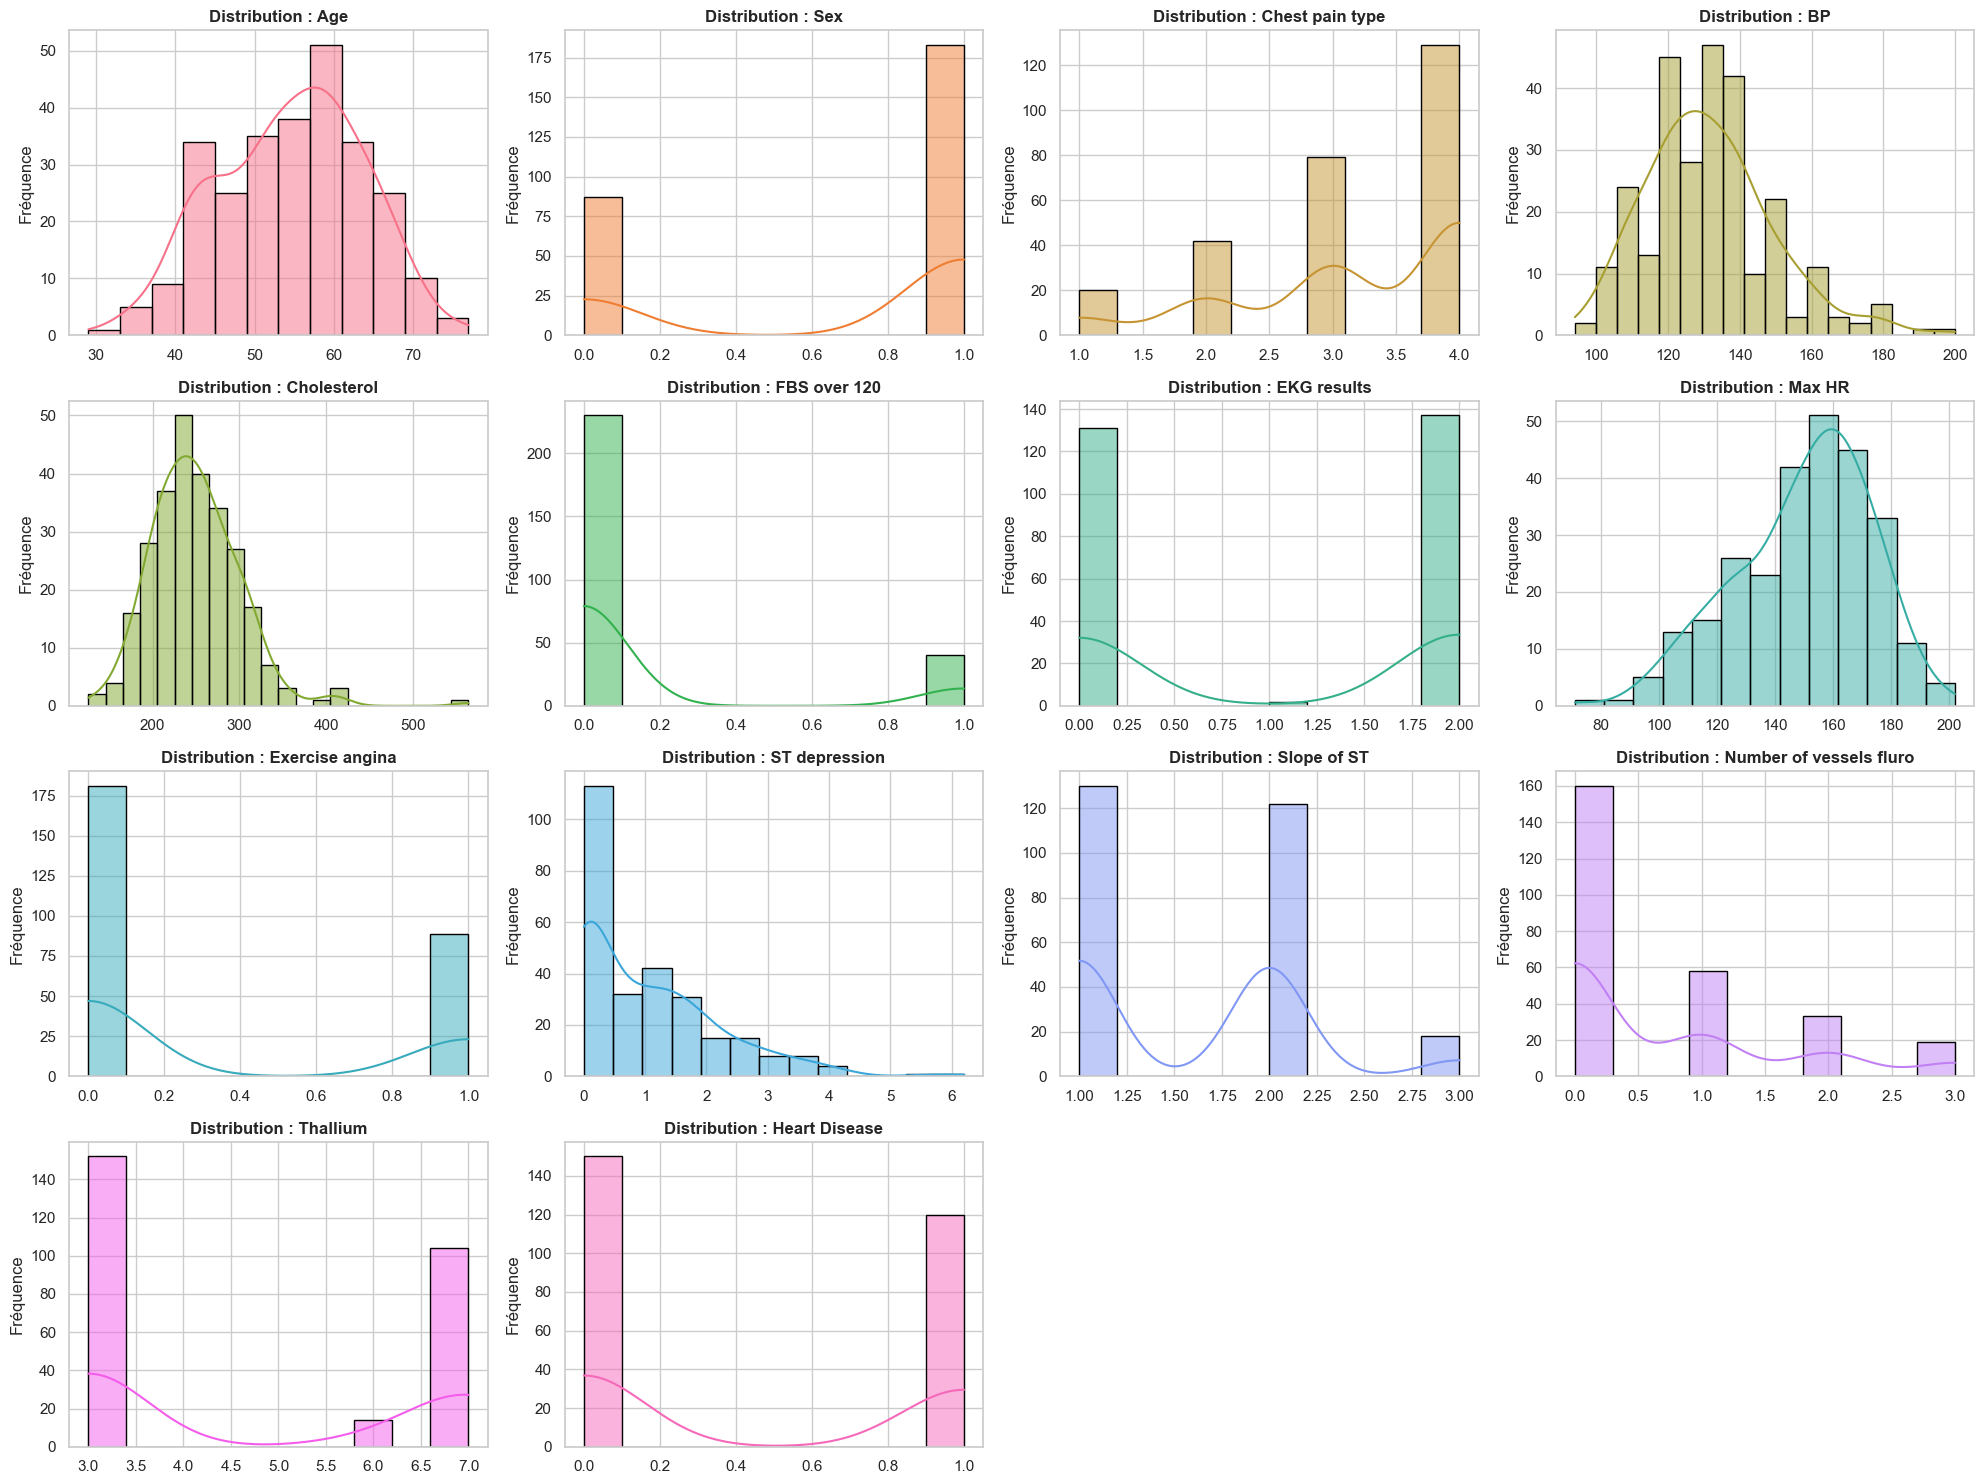

In [62]:
# --- 2. GÉNÉRATION DES GRAPHIQUES (HISTOGRAMMES & DISTRIBUTIONS) ---
# Configuration visuelle
sns.set_theme(style="whitegrid")
colonnes = df_cleaned.columns
n_cols = 4
n_rows = (len(colonnes) + n_cols - 1) // n_cols  # Calcul automatique du nombre de lignes

# Création de la figure
fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 15))
axes = axes.flatten()
palette = sns.color_palette("husl", len(colonnes)) # Une couleur différente par variable

# Boucle de traçage pour chaque variable 
for i, col in enumerate(colonnes):
    sns.histplot(df_cleaned[col], kde=True, ax=axes[i], color=palette[i], edgecolor='black')
    axes[i].set_title(f'Distribution : {col}', fontweight='bold')
    axes[i].set_xlabel('')
    axes[i].set_ylabel('Fréquence')

# Nettoyage : on retire les graphiques vides si nécessaire
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show() # Affiche directement sans enregistrer

# Multivariate analysis

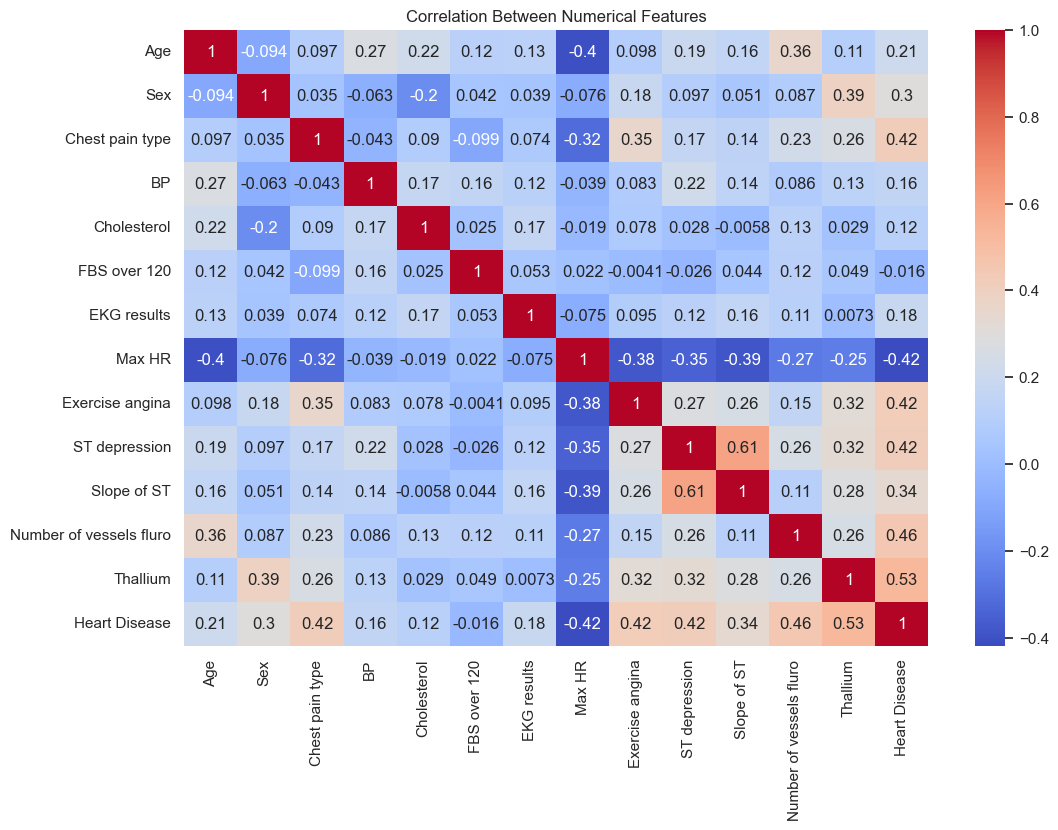

In [63]:
# Correlation Heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(df_cleaned.select_dtypes(include=['number']).corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Between Numerical Features')
plt.show()

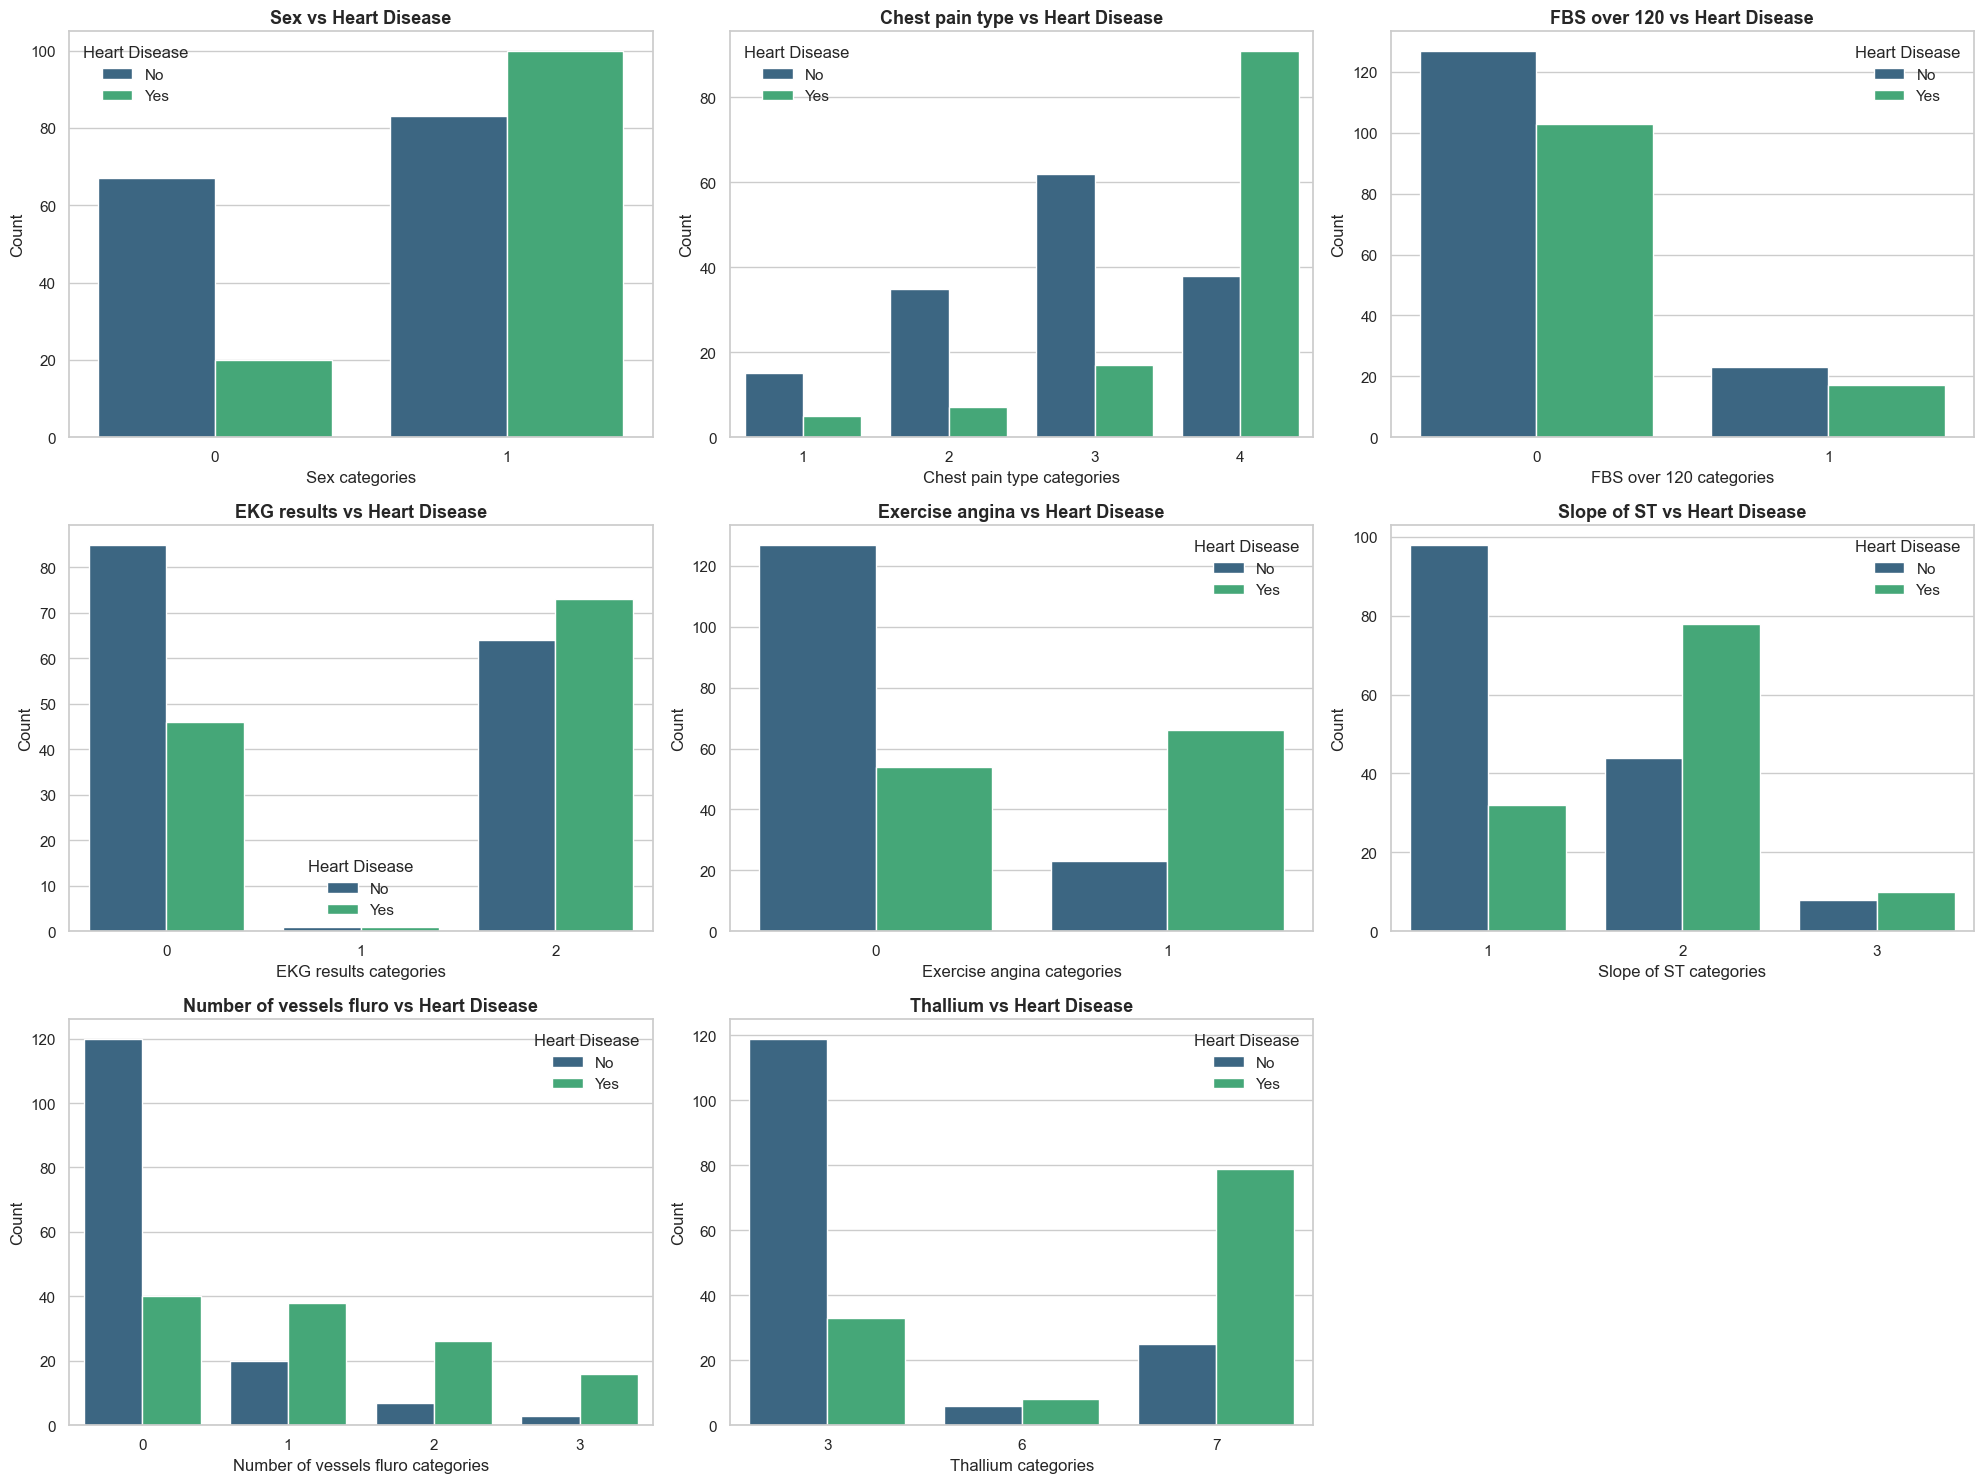

In [64]:
# --- Categorical Features Visualization ---

# List of categorical columns based on your dataset
cat_cols = ['Sex', 'Chest pain type', 'FBS over 120', 'EKG results', 
            'Exercise angina', 'Slope of ST', 'Number of vessels fluro', 'Thallium']

# Setting up the figure for a 3x3 grid
plt.figure(figsize=(20, 15))

# Loop through each categorical variable
for i, col in enumerate(cat_cols):
    plt.subplot(3, 3, i + 1)
    
    # Plotting the count of patients with/without disease for each category
    sns.countplot(data=df_cleaned, x=col, hue='Heart Disease', palette='viridis')
    
    # Professional English titles and labels
    plt.title(f'{col} vs Heart Disease', fontsize=13, fontweight='bold')
    plt.xlabel(f'{col} categories')
    plt.ylabel('Count')
    plt.legend(title='Heart Disease', labels=['No', 'Yes'])

plt.tight_layout()
plt.show()

In [65]:

# . Liste des variables numériques à tester
num_features = ['Age', 'BP', 'Cholesterol', 'Max HR', 'ST depression']

print("--- STEP 4: ANOVA TEST RESULTS (NUMERICAL VARIABLES) ---")
print(f"{'Variable':<25} | {'F-statistic':<12} | {'p-value':<10} | {'Status'}")
print("-" * 70)

for col in num_features:
    # On sépare les données en deux groupes selon la cible 'Heart Disease'
    group_healthy = df_cleaned[df_cleaned['Heart Disease'] == 0][col]
    group_sick = df_cleaned[df_cleaned['Heart Disease'] == 1][col]
    
    # Exécution de l'ANOVA à un facteur (One-way ANOVA)
    f_stat, p_val = stats.f_oneway(group_healthy, group_sick)
    
    # Verdict : on rejette l'hypothèse nulle si p < 0.05
    status = "SIGNIFICANT" if p_val < 0.05 else "NOT SIGNIFICANT"
    
    # Affichage formaté
    print(f"{col:<25} | {f_stat:<12.2f} | {p_val:<10.5f} | {status}")

print("-" * 70)

--- STEP 4: ANOVA TEST RESULTS (NUMERICAL VARIABLES) ---
Variable                  | F-statistic  | p-value    | Status
----------------------------------------------------------------------
Age                       | 12.65        | 0.00044    | SIGNIFICANT
BP                        | 6.63         | 0.01056    | SIGNIFICANT
Cholesterol               | 3.79         | 0.05274    | NOT SIGNIFICANT
Max HR                    | 56.91        | 0.00000    | SIGNIFICANT
ST depression             | 56.73        | 0.00000    | SIGNIFICANT
----------------------------------------------------------------------


In [99]:

# 1. List of categorical variables from your dataset
cat_cols = ['Sex', 'Chest pain type', 'FBS over 120', 'EKG results', 
            'Exercise angina', 'Slope of ST', 'Number of vessels fluro', 'Thallium']

print("--- STEP 4: CHI-SQUARE TEST RESULTS (CATEGORICAL VARIABLES) ---")
print(f"{'Variable':<25} | {'p-value':<10} | {'Status'}")
print("-" * 55)

for col in cat_cols:
    # Create the contingency table (cross-tabulation)
    # It counts how many people are in each category vs Sick/Healthy
    contingency_table = pd.crosstab(df_cleaned[col], df_cleaned['Heart Disease'])
    
    # Run the Chi-Square test
    # p_val is the probability that the relationship is due to chance
    chi2, p_val, dof, expected = chi2_contingency(contingency_table)
    
    # Verdict: p < 0.05 means the variable is a reliable predictor
    status = "SIGNIFICANT" if p_val < 0.05 else "NOT SIGNIFICANT"
    
    print(f"{col:<25} | {chi2:<10.5f} | {p_val:<10.5f} | {status}")

print("-" * 55)

--- STEP 4: CHI-SQUARE TEST RESULTS (CATEGORICAL VARIABLES) ---
Variable                  | p-value    | Status
-------------------------------------------------------
Sex                       | 22.66726   | 0.00000    | SIGNIFICANT
Chest pain type           | 68.58821   | 0.00000    | SIGNIFICANT
FBS over 120              | 0.00917    | 0.92371    | NOT SIGNIFICANT
EKG results               | 8.97945    | 0.01122    | SIGNIFICANT
Exercise angina           | 45.69187   | 0.00000    | SIGNIFICANT
Slope of ST               | 40.37039   | 0.00000    | SIGNIFICANT
Number of vessels fluro   | 62.86309   | 0.00000    | SIGNIFICANT
Thallium                  | 74.56935   | 0.00000    | SIGNIFICANT
-------------------------------------------------------



# Defining Target and Feature Variables

In [86]:

x=df_cleaned.drop(columns=['Heart Disease'])
y=df_cleaned['Heart Disease']
x_train,x_test,y_train, y_test=train_test_split(x, y, test_size=0.2, random_state=42)


In [102]:

model=DecisionTreeClassifier(random_state=42)
model.fit(x, y)

DecisionTreeClassifier(random_state=42)

# Tree visual  

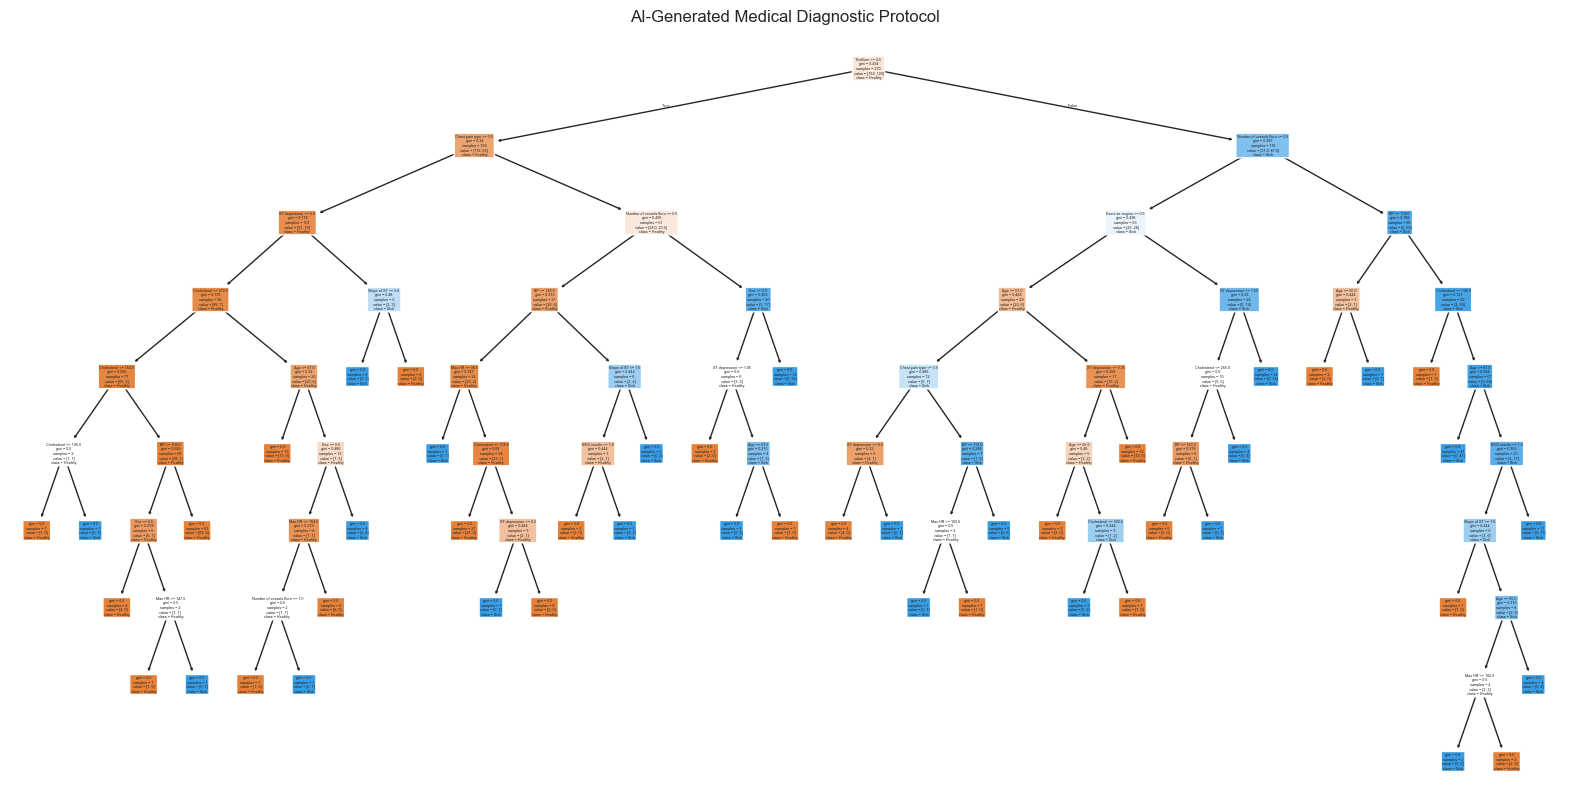

In [103]:
# 3. Visualisation de l'arbre
plt.figure(figsize=(20,10))
plot_tree(model, feature_names=x.columns.tolist(), class_names=['Healthy', 'Sick'], filled=True, rounded=True)
plt.title("AI-Generated Medical Diagnostic Protocol")
plt.show()